In [166]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
import os

In [167]:
number = 7
if number < 10:
    number = '0' + str(number)
else:
    number = str(number)
instance = 'instances/ex'+str(number)+'.lp'
command = 'clingo creek.lp ' + instance + ' > output.lp'
stream = os.popen(command)
output = stream.read()

In [168]:
with open(instance,'r') as file:
    lines = file.readlines()

for line in lines:
    if 'cell(' in line:
        li = line.replace('..',' ').replace(',',' ').replace(')',' ')
        n_columns = int(li.split()[1])
        n_rows = int(li.split()[3])
        print("Columns: {}, Rows: {}".format(columns,rows))

Columns: 4, Rows: 3


In [169]:
def get_color(cells,x,y):    
    to_look = '('+str(x)+','+str(y)+')'
    for cell in cells:
        if to_look in cell:
            if 'white' in cell:
                return 1
            elif 'black' in cell:
                return 0
            else:
                print('WTH?')
                return -2

with open('output.lp','r') as file:
    lines = file.readlines()

for line in lines:
    if 'black(' in line:
        cells = line.split()
        break

print("CELLS {}".format(cells))

data = []
for y in range(1,n_rows+1):
    row = []
    for x in range(1,n_columns+1):
        color = get_color(cells,x,y)
        row.append(color)
    data.append(row)
    
print("Data {}".format(data))

CELLS ['hint(0,2,1)', 'hint(0,3,0)', 'hint(1,1,2)', 'hint(1,4,3)', 'hint(2,0,1)', 'hint(2,5,1)', 'hint(3,1,3)', 'hint(3,2,3)', 'hint(3,4,2)', 'hint(5,1,2)', 'hint(5,3,2)', 'hint(5,5,2)', 'black(1,2)', 'white(1,3)', 'white(1,4)', 'black(1,1)', 'black(1,5)', 'white(1,6)', 'white(2,1)', 'white(2,2)', 'white(2,3)', 'black(2,4)', 'black(2,5)', 'white(2,6)', 'black(3,1)', 'black(3,2)', 'white(3,3)', 'white(3,4)', 'white(3,5)', 'white(3,6)', 'white(4,1)', 'black(4,2)', 'black(4,3)', 'black(4,4)', 'black(4,5)', 'white(4,6)', 'white(5,1)', 'white(5,2)', 'white(5,3)', 'white(5,4)', 'white(5,5)', 'white(5,6)', 'black(6,1)', 'black(6,2)', 'black(6,3)', 'black(6,4)', 'black(6,5)', 'black(6,6)']
Data [[0, 1, 0, 1, 1, 0], [0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 0]]


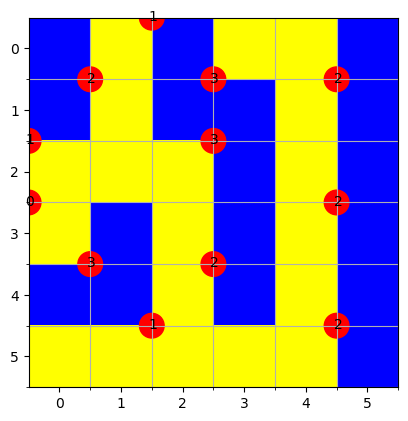

In [170]:
colormap = colors.ListedColormap(["blue","yellow"])
#pyplot.figure(figsize=(5,5))

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks([0.5 + i for i in range(n_columns)], minor=True)
ax.xaxis.grid(True, which='minor')

ax.set_yticks([0.5 + i for i in range(n_rows)], minor=True)
ax.yaxis.grid(True, which='minor')

#plt.ylim(1,n_rows)
#plt.xlim(1,n_columns)
for c in cells:
    if 'hint' in c:
        v = c.replace('(',' ').replace(',',' ').replace(')',' ')
        v_list = v.split()
        y = int(v_list[1])
        x = int(v_list[2])
        n = v_list[3]
        circle = plt.Circle((y-0.5, x-0.5), 0.2, color='r')        
        ax.add_patch(circle)
        ax.text(y-0.55,x-0.45,n)
plt.imshow(data, cmap=colormap)
plt.show()